# Graph 3: A simpe sequential graph with a single path

In [1]:
#imports
from typing import TypedDict
from langgraph.graph import StateGraph

In [2]:
# Agent State
class AgentState(TypedDict):
    """
    Represents the state of the agent.
    """
    name: str
    age: str
    final: str

In [3]:
# Node Definitions
def first_node(state: AgentState) -> AgentState:
    """
    First node in the state graph.
    """
    state['final'] = f"Hi, {state['name']}! "
    return state

def second_node(state: AgentState) -> AgentState:
    """
    Second node in the state graph.
    """
    state['final'] += f"You are {state['age']} years old. "
    return state

In [7]:
# State Graph Definition
graph = StateGraph(AgentState)
graph.add_node("first", first_node)
graph.add_node("second", second_node)
graph.add_edge("first", "second")
graph.set_entry_point("first",)
graph.set_finish_point("second")
app = graph.compile()

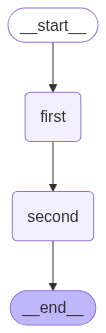

In [8]:
# Visualize the graph
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [9]:
# Run the app
result = app.invoke(
    {
        "name": "Aditya",
        "age": "30",
    }
)

In [11]:
result['final']

'Hi, Aditya! You are 30 years old. '

## Exercise: 

In [12]:
# imports
from langgraph.graph import StateGraph
from typing import TypedDict, List

In [35]:
# State
class State(TypedDict):
    name: str
    age: str
    skills: List[str]
    final: str

In [66]:
# Nodes
def first_node(state: State) -> State:
    """
    First node in the state graph.
    """
    state['final'] = f"Hi, {state['name']}! Welcome to the system. "
    return state

def second_node(state: State) -> State:
    """
    Second node in the state graph.
    """
    state['final'] += f"You are {state['age']} years old. "
    return state

def third_node(state: State) -> State:
    """
    Third node in the state graph.
    """
    try:
        if state['skills']:
            skills_str = ", ".join(state['skills'])
            state['final'] += f"Your skills are: {skills_str}. "
        else:
            raise KeyError
    except KeyError:
        state['final'] += "You have no skills listed. "
    return state

In [67]:
# State Graph
graph = StateGraph(State)

graph.add_node("first", first_node)
graph.add_node("second", second_node)
graph.add_node("third", third_node)

graph.add_edge("first", "second")
graph.add_edge("second", "third")

graph.set_entry_point("first")
graph.set_finish_point("third")

app2 = graph.compile()

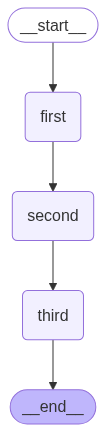

In [68]:
# Visualize
from IPython.display import display, Image
display(Image(app2.get_graph().draw_mermaid_png()))

In [72]:
# Execute
result = app2.invoke(
    {
        "name": "Aditya",
        "age": "30",
        # "skills": ["Python", "AI", "Data Science"]
    }
)
result['final']

'Hi, Aditya! Welcome to the system. You are 30 years old. You have no skills listed. '